# Assignment 2:

* Importing 

In [1]:
import pandas as pd
import numpy as np
import requests

## Question 1:
* Get the time series for the following cryptocurrencies from cryptowat.ch starting from 2021-11-22, hourly data. 
Cryptos: "ETH", "SOL", "AVAX", "USDT", "FLOW".


In [2]:
def get_market_token(market, token):
    data = requests.get(
        f'https://api.cryptowat.ch/markets/{market}/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )
    df = pd.DataFrame(
        data.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [3]:
mar_tkn = {"coinbase-pro": ["ETH", "SOL", "USDT", "AVAX"], "kraken": ["FLOW"]}

In [4]:
df_base = [[get_market_token(i, t) for t in j] for i,j in mar_tkn.items()]

In [5]:
new_df = [df_base[0][0], df_base[0][1], df_base[0][2], df_base[0][3], df_base[1][0]]

In [6]:
df_con = pd.concat(new_df)

In [7]:
df_con

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...,...
581,2021-12-16 05:00:00,8.854,8.854,8.822,8.833,367.501906,3.245848e+03,FLOW
582,2021-12-16 06:00:00,8.848,8.867,8.835,8.842,3103.945817,2.747563e+04,FLOW
583,2021-12-16 07:00:00,8.820,8.850,8.811,8.850,1921.469318,1.697437e+04,FLOW
584,2021-12-16 08:00:00,8.850,8.874,8.850,8.866,2550.757420,2.260739e+04,FLOW


## Question 2

* Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume


In [8]:
total_USD_Volume = df_con.groupby('token')["volumeUSD"].sum().to_frame()

In [9]:
total_USD_Volume_sort = total_USD_Volume.sort_values('volumeUSD', ascending =False)
total_USD_Volume_sort

,volumeUSD
token,
ETH,2.292089e+10
SOL,7.515619e+09
AVAX,3.837606e+09
USDT,2.090354e+09
FLOW,9.088772e+07


## Question 3:

* Add a column that calculates the close price ratio between ETH and SOL for each house (i.e. close price of ETH / close price of SOL for each period)


In [10]:
df_base[0][0]["close"]
df_base[0][1]["close"]
div = df_base[0][0]["close"]/df_base[0][1]["close"]


df_con["eth_sol_cl_pr"] = div

In [11]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)


In [12]:
# To display the ETH/ SOL pair only (the index needs to be increased at the time of review due to the fact of increase number of hours)
df_con.head()

,ts,open,high,low,close,volume,volumeUSD,token,eth_sol_cl_pr
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH,18.471694
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH,18.736150
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH,18.577985
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH,18.794937
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH,18.891059


## Question 4:

* Change the name of the volume and volumeUSD columns to volumeBase and volumeTerm


In [13]:
df_con = df_con.rename(columns={"volume":"volumeBase", "volumeUSD": "volumeTerm"})
df_con

,ts,open,high,low,close,volumeBase,volumeTerm,token,eth_sol_cl_pr
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
581,2021-12-16 05:00:00,8.854,8.854,8.822,8.833,367.501906,3.245848e+03,FLOW,22.663917
582,2021-12-16 06:00:00,8.848,8.867,8.835,8.842,3103.945817,2.747563e+04,FLOW,22.839186
583,2021-12-16 07:00:00,8.820,8.850,8.811,8.850,1921.469318,1.697437e+04,FLOW,22.501231
584,2021-12-16 08:00:00,8.850,8.874,8.850,8.866,2550.757420,2.260739e+04,FLOW,22.542500


## Question 5:

* create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of 200 rows and 5 columns)


In [14]:
eth_cl = df_base[0][0].set_index('ts')['close'].rename("ETH").to_frame()
print(eth_cl)
sol_cl = df_base[0][1].set_index('ts')['close'].rename("SOL").to_frame()
print(sol_cl)
usdt_cl = df_base[0][2].set_index('ts')['close'].rename("USDT").to_frame()
print(usdt_cl)
avax_cl = df_base[0][3].set_index('ts')['close'].rename("AVAX").to_frame()
print(avax_cl)
flow_cl = df_base[1][0].set_index('ts')['close'].rename("FLOW").to_frame()
print(flow_cl)

                         ETH
ts                          
2021-11-22 00:00:00  4262.99
2021-11-22 01:00:00  4234.37
2021-11-22 02:00:00  4217.89
2021-11-22 03:00:00  4193.47
2021-11-22 04:00:00  4168.35
...                      ...
2021-12-16 05:00:00  4011.06
2021-12-16 06:00:00  3986.58
2021-12-16 07:00:00  4021.87
2021-12-16 08:00:00  4023.16
2021-12-16 09:00:00  4026.13

[586 rows x 1 columns]
                         SOL
ts                          
2021-11-22 00:00:00  230.785
2021-11-22 01:00:00  226.000
2021-11-22 02:00:00  227.037
2021-11-22 03:00:00  223.117
2021-11-22 04:00:00  220.652
...                      ...
2021-12-16 05:00:00  176.980
2021-12-16 06:00:00  174.550
2021-12-16 07:00:00  178.740
2021-12-16 08:00:00  178.470
2021-12-16 09:00:00  180.040

[586 rows x 1 columns]
                       USDT
ts                         
2021-11-22 00:00:00  1.0012
2021-11-22 01:00:00  1.0013
2021-11-22 02:00:00  1.0012
2021-11-22 03:00:00  1.0011
2021-11-22 04:00:00  1.0009
..

In [15]:
#x = eth_cl.merge(sol_cl, on = "ts")
cl_table = pd.concat([eth_cl, sol_cl, usdt_cl, avax_cl, flow_cl], axis=1)
cl_table

,ETH,SOL,USDT,AVAX,FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,1.0012,128.67,14.150
2021-11-22 01:00:00,4234.37,226.000,1.0013,134.85,13.621
2021-11-22 02:00:00,4217.89,227.037,1.0012,132.54,13.753
2021-11-22 03:00:00,4193.47,223.117,1.0011,133.38,13.652
2021-11-22 04:00:00,4168.35,220.652,1.0009,136.29,13.581
...,...,...,...,...,...
2021-12-16 05:00:00,4011.06,176.980,1.0003,103.00,8.833
2021-12-16 06:00:00,3986.58,174.550,1.0003,101.69,8.842
2021-12-16 07:00:00,4021.87,178.740,1.0003,104.29,8.850


## Question 6:

* calculate the hour by hour log return of the close price of each token (return is calculated by np.log(price_t / price_{t-1}))


In [16]:
a = []
for row_ind in range(len(cl_table)):
    x = np.log(cl_table["ETH"][row_ind]/cl_table["ETH"][row_ind - 1])
    a.append(x)
    
b = []
for row_ind in range(len(cl_table)):
    x = np.log(cl_table["SOL"][row_ind]/cl_table["SOL"][row_ind - 1])
    b.append(x)
    
c = []
for row_ind in range(len(cl_table)):
    x = np.log(cl_table["USDT"][row_ind]/cl_table["USDT"][row_ind - 1])
    c.append(x)
    
d = []
for row_ind in range(len(cl_table)):
    x = np.log(cl_table["AVAX"][row_ind]/cl_table["AVAX"][row_ind - 1])
    d.append(x)
    
e = []
for row_ind in range(len(cl_table)):
    x = np.log(cl_table["FLOW"][row_ind]/cl_table["FLOW"][row_ind - 1])
    e.append(x)
    

In [17]:
ETH_pr_chg = pd.DataFrame(a, columns = ["ETH_pr_chg"])
SOL_pr_chg = pd.DataFrame(b, columns = ["SOL_pr_chg"])
USDT_pr_chg = pd.DataFrame(c, columns = ["USDT_pr_chg"])
AVAX_pr_chg = pd.DataFrame(d, columns = ["AVAX_pr_chg"])
FLOW_pr_chg = pd.DataFrame(e, columns = ["FLOW_pr_chg"])


In [18]:
price_table = pd.concat([ETH_pr_chg, SOL_pr_chg, USDT_pr_chg, AVAX_pr_chg, FLOW_pr_chg], axis=1)
price_table

,ETH_pr_chg,SOL_pr_chg,USDT_pr_chg,AVAX_pr_chg,FLOW_pr_chg
0,0.057165,0.248307,0.000899,0.224368,0.470428
1,-0.006736,-0.020952,0.000100,0.046912,-0.038102
2,-0.003900,0.004578,-0.000100,-0.017279,0.009644
3,-0.005806,-0.017417,-0.000100,0.006318,-0.007371
4,-0.006008,-0.011109,-0.000200,0.021583,-0.005214
...,...,...,...,...,...
581,-0.002331,-0.010343,-0.000100,-0.020659,-0.000792
582,-0.006122,-0.013825,0.000000,-0.012800,0.001018
583,0.008813,0.023721,0.000000,0.025247,0.000904
584,0.000321,-0.001512,0.000100,-0.011379,0.001806


## Question 7 & 8:

In [19]:
from pandas.plotting import autocorrelation_plot

----------------------------------------------------------- 
 Ether, Solana, USDT, AVAX, and FLOW Correlation over time 
-----------------------------------------------------------


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

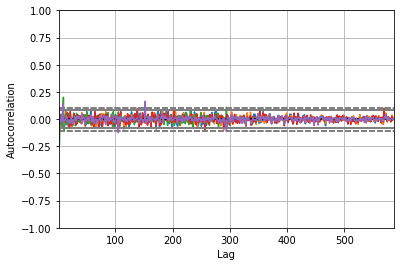

In [20]:
print("----------------------------------------------------------- \n Ether, Solana, USDT, AVAX, and FLOW Correlation over time \n-----------------------------------------------------------")

autocorrelation_plot(price_table.ETH_pr_chg)

autocorrelation_plot(price_table.SOL_pr_chg)

autocorrelation_plot(price_table.USDT_pr_chg)

autocorrelation_plot(price_table.AVAX_pr_chg)

autocorrelation_plot(price_table.FLOW_pr_chg)


* There is no autocorrelation over all cryptos among time.